# Introduction

Data Science Project: Price prediction on pre-owned vehicles

Completion Date: 28/7/2020

by: Azgar Tar

## Dataset Information

The dataset (.csv file) used in this project includes 4345 individual vehicle entries recorded on the purchase by a pre-owned sales department. They include variables which are considered to attribute towards the purchase price of the vehicle, which is also listed in the dataset.

## Project Goal

The Goal of this project is to clean and prepare the data, and to build a machine learning model in order to, as accurately as possible, predict a price on future purchases 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()

pd.options.display.max_rows= None

### Import Data

In [2]:
df_raw = pd.read_csv('cars.csv') 

### Data Examination

In [3]:
df_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Pre-processing the Data

#### The 'Model' column includes too many categories in order to be converted to dummy variables.
#### The 'Registration' column will not have significant impact on the translation of the data.
#### We can remove the abovemetioned columns for these reasons

In [5]:
df_1 = df_raw.drop(['Model','Registration'], axis=1)
df_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,936,NaN,1649,NaN,NaN,2019,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,2012.000000


#### Check the null cells

In [6]:
df_1.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

#### We can afford to drop these rows completely, I have considered that less then 5% of data as irrelevant when compared to the negative effect the same data will have on training if included.

In [7]:
df_2 = df_1.dropna(axis=0)
df_2.isnull().sum()

Brand          0
Price          0
Body           0
Mileage        0
EngineV        0
Engine Type    0
Year           0
dtype: int64

In [8]:
df_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1534,NaN,NaN,1861,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,2012.000000


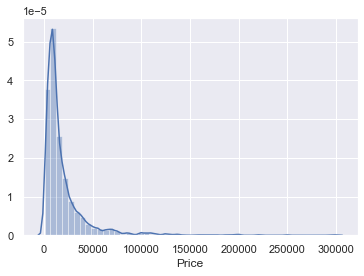

In [9]:
sns.distplot(df_2['Price'])

#### As noticed in the graph above, the distribution of the 'Price' data is extremely skewed, seemingly due to very few outliers which are high in value in terms of the purchase price of a vehicle and very far off from the mean, as a result, I have chosen to remove anything above 90% quantile.

#### Below is the process and result, the graph is now much more normally distributed.

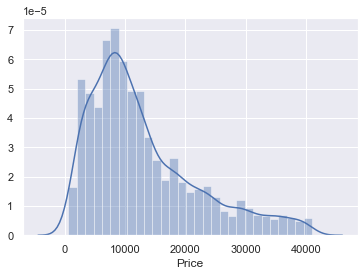

In [10]:
q = df_2["Price"].quantile(0.90)
df_3 = df_2[df_2["Price"]<q]
sns.distplot(df_3['Price'])

In [11]:
df_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3622,3622.000000,3622,3622.000000,3622.000000,3622,3622.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,850,NaN,1444,NaN,NaN,1608,NaN
mean,NaN,12951.076521,NaN,177.020983,2.688192,NaN,2005.546107
std,NaN,9028.269200,NaN,97.240484,5.183080,NaN,6.507230
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6500.000000,NaN,110.000000,1.800000,NaN,2002.000000
50%,NaN,10400.000000,NaN,170.000000,2.000000,NaN,2007.000000
75%,NaN,17500.000000,NaN,240.000000,2.800000,NaN,2011.000000


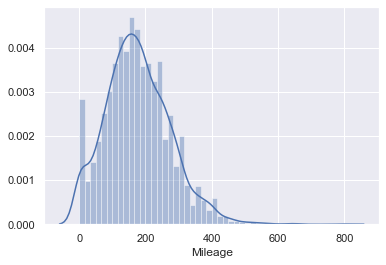

In [12]:
sns.distplot(df_3['Mileage'])

#### The 'Mileage" data seems to have a fairly skewed distribution whereby outliers could negatively effect the efficiency of the model.

#### I have removed outliers above 90% quantile, the process and result is seen below, with a much improved normal distribution.

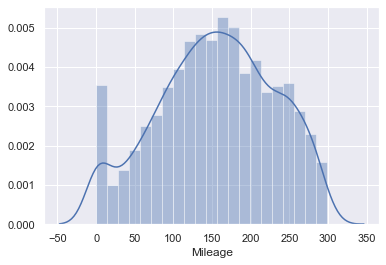

In [13]:
q = df_3["Mileage"].quantile(0.90)
df_4 = df_3[df_3["Mileage"]<q]
sns.distplot(df_4['Mileage'])

In [14]:
df_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3229,3229.000000,3229,3229.000000,3229.000000,3229,3229.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,766,NaN,1226,NaN,NaN,1408,NaN
mean,NaN,13829.458365,NaN,154.971818,2.655088,NaN,2006.567668
std,NaN,9108.664930,NaN,75.017525,4.910637,NaN,5.855246
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,7400.000000,NaN,102.000000,1.800000,NaN,2004.000000
50%,NaN,11300.000000,NaN,158.000000,2.000000,NaN,2007.000000
75%,NaN,18500.000000,NaN,212.000000,2.800000,NaN,2011.000000


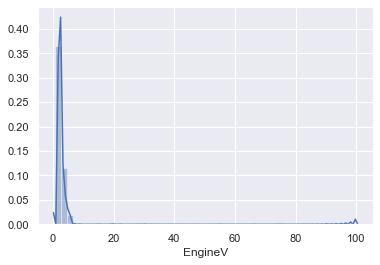

In [15]:
sns.distplot(df_4['EngineV'])

#### The 'EngineV' data is excessively skewed which is irregular in terms of engine volume standards.

In [16]:
df_4['EngineV'].unique()

array([ 2.  ,  4.2 ,  2.7 ,  1.5 ,  1.8 ,  1.79,  4.7 ,  2.5 ,  2.4 ,
        1.4 ,  3.  ,  2.2 ,  1.3 ,  2.3 ,  3.8 ,  4.8 ,  1.9 ,  2.15,
        5.  ,  3.5 ,  1.6 ,  4.  ,  3.2 ,  1.1 ,  4.4 ,  2.6 ,  0.65,
        1.7 ,  4.5 ,  4.6 ,  5.5 ,  3.6 ,  2.8 ,  2.99,  1.  , 99.99,
        5.7 ,  1.2 ,  3.7 ,  6.  , 15.  ,  6.2 ,  2.9 ,  4.3 ,  6.3 ,
       30.  , 28.  , 22.  ,  1.33,  2.1 ,  2.14, 55.  ,  1.39,  7.2 ,
       20.  , 74.  , 66.  , 90.  ,  1.46,  0.6 ,  5.2 ,  1.59,  2.57,
       75.  ,  9.  ,  5.46,  6.5 , 19.  ])

#### As noticed above, there are inputs up to 99.99, which is incorrect and likely to be human error upon capturing the data.

#### As part of my research, I make reference to the website: https://jalopnik.com/the-worlds-ten-largest-engines-509258535
#### In which I found that the largest engine volume currently in a production vehicle is 8.4 litres.

#### I have decided to set 6.0 as a maximum, removing everything above due to possible outliers which do not occur frequently, this is expected to improve the efficiency of the model.

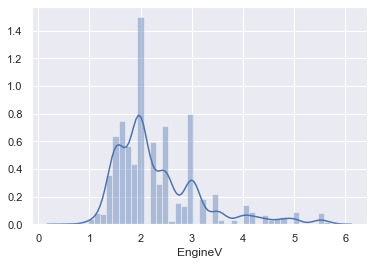

In [17]:
df_5 = df_4[df_4["EngineV"]<6.0]
sns.distplot(df_5['EngineV'])

In [18]:
df_5.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3195,3195.000000,3195,3195.000000,3195.000000,3195,3195.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,761,NaN,1209,NaN,NaN,1401,NaN
mean,NaN,13812.408469,NaN,154.819718,2.331997,NaN,2006.584038
std,NaN,9074.099668,NaN,75.103594,0.866920,NaN,5.864420
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,7400.000000,NaN,102.000000,1.800000,NaN,2004.000000
50%,NaN,11300.000000,NaN,158.000000,2.000000,NaN,2008.000000
75%,NaN,18500.000000,NaN,212.000000,2.700000,NaN,2011.000000


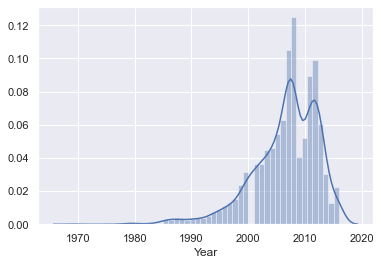

In [19]:
sns.distplot(df_5['Year'])

#### The 'Year' data includes a few outliers as well, these are much older models which are unlikely to be a frequent purchase in future, hence my decision to remove data in the 5% (oldest) quantile.

#### The result below is a much improved normal distribution.

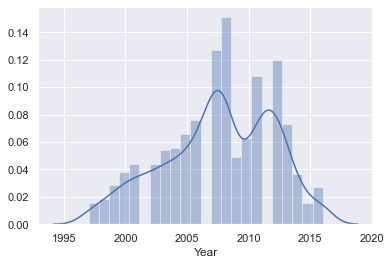

In [20]:
q = df_5['Year'].quantile(0.05) 
df_6 = df_5[df_5['Year']>q]
sns.distplot(df_6['Year'])

In [21]:
df_6.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3008,3008.000000,3008,3008.000000,3008.000000,3008,3008.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,708,NaN,1093,NaN,NaN,1368,NaN
mean,NaN,14419.570549,NaN,152.785572,2.345858,NaN,2007.531250
std,NaN,8956.380931,NaN,73.442386,0.877073,NaN,4.459964
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1997.000000
25%,NaN,8000.000000,NaN,101.000000,1.800000,NaN,2005.000000
50%,NaN,11809.475000,NaN,155.000000,2.000000,NaN,2008.000000
75%,NaN,18992.250000,NaN,206.000000,2.800000,NaN,2011.000000


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_6[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,5.437150,Mileage
1,8.350490,EngineV
2,10.909498,Year


#### As seen above, using the variance inflation factor method of statsmodels, there is a considerable multi-colinearity of the 'Year' data when compared to the rest of the numerical data.

#### However, I have chosen NOT to remove the 'Year' Data due to it being a key underlying factor in terms of the value of a pre-owned vehicle in real world as well as in the training of a machine learning model.

In [23]:
df_7 = df_6#.drop(['Year'], axis=1)
df_7.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
7,Audi,14200.0,vagon,200,2.7,Diesel,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,1999


#### Above concludes the pre-processing of numerical feature.

#### Below, we will assign dummie variables to all categorical features.

In [24]:
df_with_dummies = pd.get_dummies(df_7, drop_first=True)
df_with_dummies.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
3,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7,14200.0,200,2.7,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,10799.0,193,1.5,2012,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9,1400.0,212,1.8,1999,0,0,0,0,0,1,0,1,0,0,0,1,0,0


#### We briefly inspect the relationship of the numerical data ie. Year, Price and Mileage.

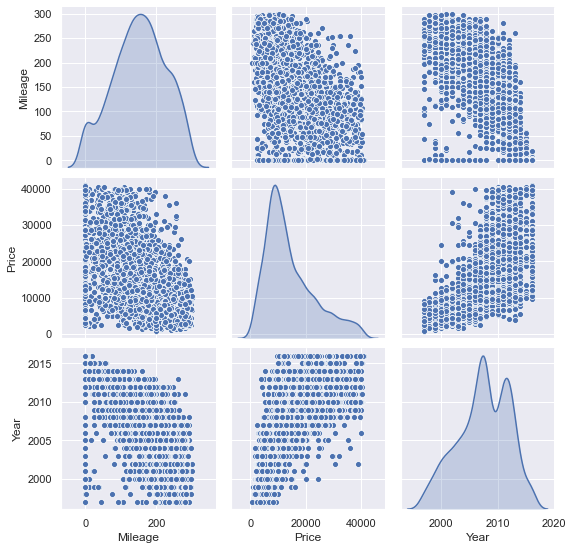

In [25]:
sns.pairplot(df_6[["Mileage", "Price", "Year"]], diag_kind="kde")

#### Upon inspection of the relationships above, I have deduced that there is no linear correlation, so we will not use a linear regression model, the graphs representation is close to a polynomial distribution.

#### As a result, I have chosen to build a Deep Neural Network Model with the use of the Tensorflow Framework.

## Assigning Targets and features

In [26]:
df_with_dummies.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
3,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7,14200.0,200,2.7,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,10799.0,193,1.5,2012,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9,1400.0,212,1.8,1999,0,0,0,0,0,1,0,1,0,0,0,1,0,0


### Assigning the Target ('Price') and the remaining data as features.

In [27]:
df_targets = df_with_dummies['Price']
df_features = df_with_dummies.drop(['Price'], axis=1)

In [28]:
df_targets.shape, df_features.shape

((3008,), (3008, 17))

## Scaling the data

#### I will scale the numerical data, which excludes all assigned dummie variables. The dummie variables do not impact the model in terms of its value, rather its assignment, as its relationship values are 1 and 0 only. Logically, they are categorised.

### Split the data into seperate dataframes

In [29]:
data_to_scale = df_features.loc[:,'Mileage':'Year']
data_not_to_scale = df_features.loc[:,'Brand_BMW':'Engine Type_Petrol']

### Scale the data thats needed to be scaled (SKlearn automatically converts the dataframe to array when scaling

In [30]:
from sklearn.preprocessing import StandardScaler
absenteeism_scaler = StandardScaler()
absenteeism_scaler.fit(data_to_scale)
scaled_data = absenteeism_scaler.transform(data_to_scale)

### Convert the unscaled data to numpy array as was automatically done with the scaler on the 'data_to_scale'

In [31]:
data_not_to_scale.to_numpy()

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Re-assemble the arrays

In [32]:
df_features_scaled = np.concatenate(( scaled_data, data_not_to_scale), axis=1)

In [33]:
df_features_scaled.shape, df_targets.shape

((3008, 17), (3008,))

### The followinng process is used in oder to allocate the training, validation and test data to individual .npz files in order to feed into the Tensorflow model.

Training Data = 80% of all data

Validation Data = 10% of all data

Test Data = Remaining data

In [34]:
samples_count = df_features_scaled.shape[0]

train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = df_features_scaled[:train_samples_count]
train_targets = df_targets[:train_samples_count]

validation_inputs = df_features_scaled[train_samples_count:train_samples_count + validation_samples_count]
validation_targets = df_targets[train_samples_count:train_samples_count + validation_samples_count]

test_inputs = df_features_scaled[train_samples_count + validation_samples_count:]
test_targets = df_targets[train_samples_count + validation_samples_count:]

### Saving to .npz files

In [35]:
np.savez('Cars_data_train', inputs = train_inputs, targets = train_targets)
np.savez('Cars_data_validation', inputs = validation_inputs, targets = validation_targets)
np.savez('Cars_data_test', inputs = test_inputs, targets = test_targets)

### Re-loading files to new variables

In [36]:
npz_train = np.load('Cars_data_train.npz')

train_inputs = npz_train['inputs'].astype(np.float)
train_targets = npz_train['targets'].astype(np.float)

npz_test = np.load('Cars_data_test.npz')

test_inputs = npz_test['inputs'].astype(np.float)
test_targets = npz_test['targets'].astype(np.float)

npz_validation = np.load('Cars_data_validation.npz')

validation_inputs = npz_validation['inputs'].astype(np.float)
validation_targets = npz_validation['targets'].astype(np.float)

In [37]:
train_inputs.shape[1]

17

#### The code below was used to cycle through a few common activation and optimization functions. As well as varying Hidden layer widths and batch sizes. This was done in order to find the best fit. Note that no overfitting was possible due to the data being reloaded and re-fitted at each cycle.

In [38]:
import openpyxl
Results_10_layers = pd.DataFrame()
hidden_layer_size = 20
activation_functions = ['relu', 'selu']
optimizor_functions = ['adam', 'adamax']
input_size = 17
output_size = 1
batch_value = 5

for n in range(5):
    hidden_layer_size += 10
    for act in activation_functions:
        act_func = act
        for opt in optimizor_functions:
            opt_func = opt
            for batch in range(5):
                batch_value = batch_value + 5
            
                model = tf.keras.Sequential([ 
                                            tf.keras.layers.Dense(hidden_layer_size, activation = act_func),
                                            tf.keras.layers.Dense(hidden_layer_size, activation = act_func),
                                            tf.keras.layers.Dense(hidden_layer_size, activation = act_func),
                                            tf.keras.layers.Dense(hidden_layer_size, activation = act_func),
                                            tf.keras.layers.Dense(hidden_layer_size, activation = act_func),
                                            tf.keras.layers.Dense(hidden_layer_size, activation = act_func),
                                            tf.keras.layers.Dense(hidden_layer_size, activation = act_func),
                                            tf.keras.layers.Dense(hidden_layer_size, activation = act_func),
                                            tf.keras.layers.Dense(hidden_layer_size, activation = act_func),
                                            tf.keras.layers.Dense(hidden_layer_size, activation = act_func),
                                            tf.keras.layers.Dense(output_size)
                                            ])

                optimizer = opt_func

                model.compile(optimizer=optimizer, loss= 'MSE', metrics=['MeanAbsolutePercentageError'])

                MAX_EPOCHS = 20
                BATCH_SIZE = batch_value

                early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

                history = model.fit(train_inputs, train_targets, 
                          batch_size = BATCH_SIZE, 
                          epochs = MAX_EPOCHS, 
                          callbacks = [early_stopping],
                          validation_data = (validation_inputs, validation_targets), 
                          verbose = 1)

                hist = pd.DataFrame(history.history['mean_absolute_percentage_error'])
                each_result = {'Optimization Function': opt_func,
                               'Activation Function': act_func,
                               'Batch_Size': BATCH_SIZE,
                               'Hidden_Layer_size': hidden_layer_size,
                               'Test Accuracy Error (off mean percentage)': hist.iloc[-1]}
                Results_10_layers = Results_10_layers.append(each_result, ignore_index=True)
                Results_10_layers.to_excel('10_layer_output.xlsx')



In [46]:
Results = '10_layer_output.xlsx'
Results = pd.read_excel(Results)

#### As per the results file displayed below. The most accurate MAPE attained through testing was done using the 'relu' activation function, the 'adam' optimization function, with hidden layers with 40 neurons wide. We will use this in the model blueprint.

In [40]:
Results.sort_values(by = ['Test Accuracy Error (off mean percentage)']).head()

,Unnamed: 0,Activation Function,Batch_Size,Hidden_Layer_size,Optimization Function,Test Accuracy Error (off mean percentage)
5,5,relu,35,40,adam,"0 23.102583\nName: 19, dtype: float64"
1,1,relu,15,30,adam,"0 23.543457\nName: 16, dtype: float64"
2,2,relu,20,30,adam,"0 23.607729\nName: 18, dtype: float64"
0,0,relu,10,30,adam,"0 23.701672\nName: 13, dtype: float64"
3,3,relu,25,30,adam,"0 23.905539\nName: 19, dtype: float64"


### Below is the model blueprint:


Hidden Layers = 10

Hidden layer width = 40 neurons

We will use the 'adam' optomizer, as it was specifically built for deep neural networks and is known to show huge performance gains in terms of speed and training.

As a performance indicator, I have chosen to use the 'MeanAbsolutePercentageError' metric, due to the fact that the more commonly used 'validation accuracy' metric is unable to ascertain the proximity of a target, rather an accurate hit on the prediction. The 'validation accuracy' would work well in a classification / logistic setting.

### We also set the hyper-parameters and fitting of the model.

We include the early stopping method with an allowance of 5 iterations for the loss to increase before the training is interrupted, thereby preventing the model from overfitting. With a maximum of 20 Epochs. The increases in loss commonly occur due to variances in the data and not neccessarily due to overfitting at every iteration, hence the allowance on the early stopping function.

In [42]:
hidden_layer_size = 40       
input_size = 17
output_size = 1


model = tf.keras.Sequential([ 
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='adam', loss= 'MSE', metrics=['MeanAbsolutePercentageError'])

MAX_EPOCHS = 20
BATCH_SIZE = 30

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

history = model.fit(train_inputs, train_targets, 
          batch_size = BATCH_SIZE, 
          epochs = MAX_EPOCHS, 
          callbacks = [early_stopping],
          validation_data = (validation_inputs, validation_targets), 
          verbose = 1)

Epoch 1/20
81/81 [==============================] - 0s 5ms/step - loss: 241774288.0000 - mean_absolute_percentage_error: 91.4616 - val_loss: 48210576.0000 - val_mean_absolute_percentage_error: 60.6641
Epoch 2/20
81/81 [==============================] - 0s 2ms/step - loss: 43431660.0000 - mean_absolute_percentage_error: 43.7170 - val_loss: 31509278.0000 - val_mean_absolute_percentage_error: 40.1807
Epoch 3/20
81/81 [==============================] - 0s 2ms/step - loss: 31164026.0000 - mean_absolute_percentage_error: 36.2097 - val_loss: 26816376.0000 - val_mean_absolute_percentage_error: 38.3897
Epoch 4/20
81/81 [==============================] - 0s 2ms/step - loss: 26913378.0000 - mean_absolute_percentage_error: 33.5312 - val_loss: 25966430.0000 - val_mean_absolute_percentage_error: 39.9262
Epoch 5/20
81/81 [==============================] - 0s 2ms/step - loss: 24007552.0000 - mean_absolute_percentage_error: 31.7252 - val_loss: 22677776.0000 - val_mean_absolute_percentage_error: 36.8489

### The Mean absolute percentage error of 22.53 % (off target) translates to an accuracy average of 77.5%

In [43]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error,epoch
0,241774288.0,91.461617,48210576.0,60.664116,0
1,43431660.0,43.717014,31509278.0,40.180740,1
2,31164026.0,36.209721,26816376.0,38.389725,2
3,26913378.0,33.531216,25966430.0,39.926220,3
4,24007552.0,31.725203,22677776.0,36.848949,4
5,21836376.0,30.562166,23516204.0,38.767323,5
6,19721168.0,29.381121,19531430.0,36.057365,6
7,17891368.0,28.572287,18515880.0,34.449436,7
8,16469117.0,27.311840,16923200.0,33.881168,8
9,15425425.0,26.588791,17285424.0,33.197433,9


## Testing the model

We test the model with the test_inputs, which was initially excluded from the training process, so the model has not seen this data.

We then plot the outputs of the test data (scattered) against the targets (45 degree line). Ideally, each output will correlate exactly on the 45 degree line.

The output below indicates a relatively good fit of the model in predicting new data.

In [44]:
test_outputs = model.predict_on_batch(test_inputs)

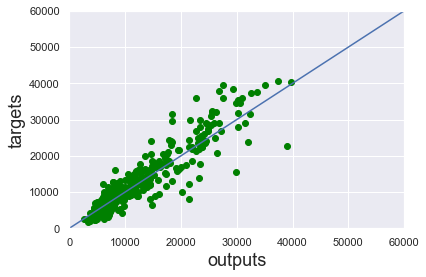

In [45]:
plt.scatter(test_outputs, test_targets, color='green')
plt.xlabel('outputs', fontsize=18)
plt.ylabel('targets', fontsize=18)
lims = [0, 60000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Conclusion

The model, when tested was reasonably effective and accurate. With an average accuracy of 77.5 %.

There is room for improvement, future work could be done, further testing of different activation and loss functions. With time and experience, the model can also be improved in terms of selecting and pre-processing the data more efficiently.

There needs to be consideration for the quality of data or lack thereof, as there are many other real world buying factors that were not in the data set, e.g the demand of a particular vehicle at the time of purchase, the condition or repair work needed on the vehicle etc. Without this information, the model can only relate to the information that was introduced.